In [1]:
import bottleneck as bn
import matplotlib
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scienceplots
import scipy
import scipy.signal
import scipy.special
import scipy.stats
import sklearn.decomposition
import astropy.io
import datetime
import astropy.time
import pandas as pd

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

figsize_short = (8, 4)
figsize_normal = (8, 6)
figsize_tall = (8, 8)
plt.rcParams['figure.figsize'] = figsize_short
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.edgecolor'] = 'none'


title_font = {'fontsize': 16, 'weight': 'bold', 'style': 'italic'}
path_effect = [pe.withStroke(linewidth=2.0, foreground="k")]

read_path = 'docs/Data/'
save_path = 'docs/Figure/'

perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
matlab_perula = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_perula', np.array(perula_df))

jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')
matlab_jet = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_jet', np.array(jet_df))

%matplotlib ipympl

<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_33476\3118345031.py:41: SyntaxWarning: invalid escape sequence '\s'
  perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_33476\3118345031.py:44: SyntaxWarning: invalid escape sequence '\s'
  jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')


cmor0.073-1.0


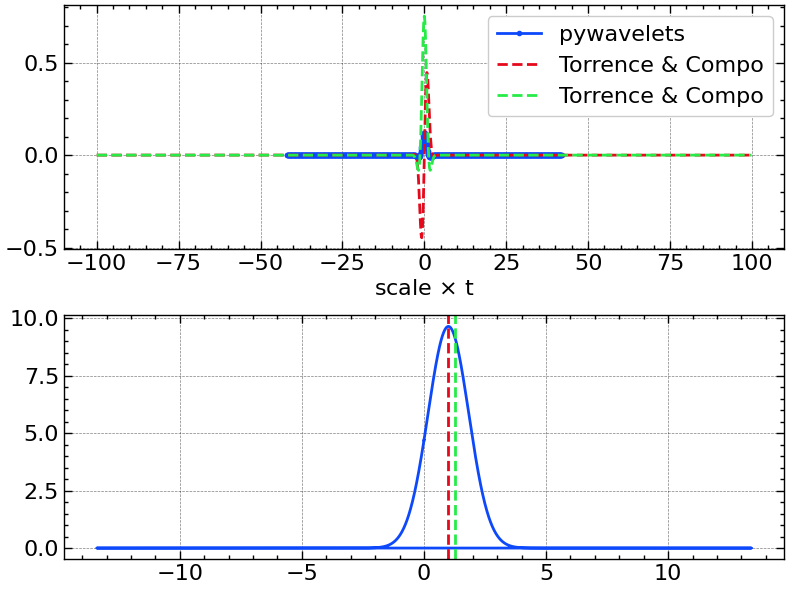

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])
%matplotlib ipympl

plt.close()
plt.figure(figsize = (8, 6))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

eta = np.linspace(-2, 2, 2 ** 10, endpoint=False)
deta = eta[1] - eta[0]
omega0 = 1.2

B, C = 2 * (omega0 / 2 / np.pi) ** 2, 1.0
print(f"cmor{B:.3f}-{C:.1f}")
[psi, x] = pywt.ContinuousWavelet(f"cmor{B:.2f}-{C:.1f}").wavefun(10)

ax1.plot(x * np.sqrt(2 / B), np.real(psi) / np.sqrt((psi.real ** 2).sum()) * (B / 2) ** 0.25, 'o-', label = 'pywavelets')

x = np.linspace(-100, 100, 2 ** 10, endpoint=False)
dx = x[1] - x[0]
psi_r = (np.pi ** -0.25) * np.exp(-x * x / 2) * np.cos( omega0 * x)
psi_i = (np.pi ** -0.25) * np.exp(-x * x / 2) * np.sin( omega0 * x)
psi = psi_r + 1j * psi_i
# psi -= np.mean(psi)
# psi /= np.sqrt(np.sum(psi ** 2))

ax1.plot(x, psi_i, '--', label = 'Torrence & Compo')
ax1.plot(x, psi_r, '--', label = 'Torrence & Compo')

n = psi.size
n = 2 ** 16
ax2.plot((np.fft.fftfreq( n = n, d = dx)) / (omega0 / 2 / np.pi), np.abs(np.fft.fft(psi, n = n)))

ax2.axvline( 1, color='C1', linestyle='--', label='Fourier Frequency')
ax2.axvline( (omega0 + np.sqrt(2 + omega0 ** 2)) / (2 * omega0), color='C2', linestyle='--', label='Fourier Frequency')

# ax2.plot((ssqueezepy.Wavelet(('morlet', {'mu': 6.0})).xifn()), (np.abs(ssqueezepy.Wavelet(('morlet', {'mu': 6.0})).psifn())))
# ax2.set_xlim(0.0, 2.0)

ax1.legend()
# ax1.plot(, 'C0o-')
ax1.set_xlabel(r'scale $\times$ t')
plt.tight_layout()
plt.show()

In [241]:
from scipy.optimize import brentq

def transcendental_eq(x, omega0):
    # 2 x^2 (1 - e^{-omega0 x}) - 2 omega0 x - 1 + e^{-omega0 x} = 0
    return 2*x**2*(1 - np.exp(-omega0*x)) \
           - 2*omega0*x \
           - 1 \
           + np.exp(-omega0*x)

omega0 = 10.0   # 举例
# 估计主根落在 x ≈ sqrt(3/2) ≈ 1.22 附近，我们选 [0.1, 5] 作为搜索区间
x_root = brentq(transcendental_eq, np.sqrt(1.5), (np.sqrt(omega0 ** 2 + 2) + omega0) / 1, args=(omega0,), xtol = 1e-12)

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\2065788859.py:10: SyntaxWarning: invalid escape sequence '\o'
  ax1.plot(omega0, omega0, '#888888', alpha = 0.5, label = '$\omega_0$')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\2065788859.py:13: SyntaxWarning: invalid escape sequence '\o'
  ax1.plot(omega0, (omega0 + np.sqrt(2 + omega0 ** 2)) / (2), 'C1--', label='$(\omega_0 + \sqrt{2 + \omega_0^2}) / 2$')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\2065788859.py:24: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_xlabel('$\omega_0$')
C:\Users

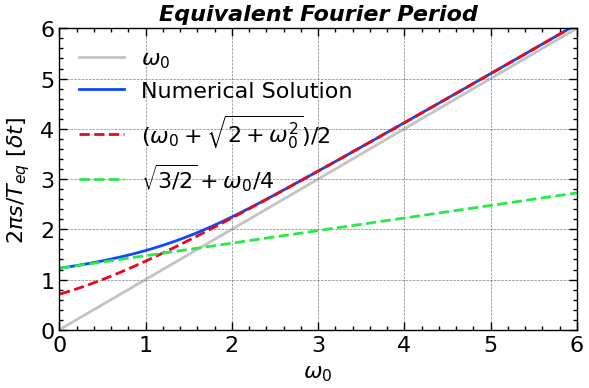

In [302]:
omega0 = np.geomspace(0.01, 6, 100)
x0 = np.zeros_like(omega0)
for idx in range(len(omega0)):
    x0[idx] = brentq(transcendental_eq, np.sqrt(1.5), (np.sqrt(omega0[idx] ** 2 + 2) + omega0[idx]) / 1, args=(omega0[idx],), xtol = 1e-12)

plt.close()
plt.figure(figsize = (6, 4))
ax1 = plt.subplot()

ax1.plot(omega0, omega0, '#888888', alpha = 0.5, label = '$\omega_0$')

ax1.plot(omega0, x0, 'C0-', label = 'Numerical Solution')
ax1.plot(omega0, (omega0 + np.sqrt(2 + omega0 ** 2)) / (2), 'C1--', label='$(\omega_0 + \sqrt{2 + \omega_0^2}) / 2$')
ax1.plot(omega0, np.sqrt(1.5) + omega0 / 4, 'C2--', label = r'$\sqrt{3/2}+\omega_0/4$')


ax1.set_title(r'Equivalent Fourier Period', **title_font)
# ax1.set_xscale('log')
ax1.autoscale(axis = 'both', tight=True)
ax1.legend(frameon = False)
ax1.set_xlim(0, 6.)
ax1.set_ylim(0, 6.)

ax1.set_xlabel('$\omega_0$')
ax1.set_ylabel('$2\pi s/T_{eq}$ [$\delta t$]')

plt.tight_layout()

plt.savefig(save_path + 'figure_fourier_period.png',bbox_inches='tight',dpi=300)

plt.show()

4.91649216460117


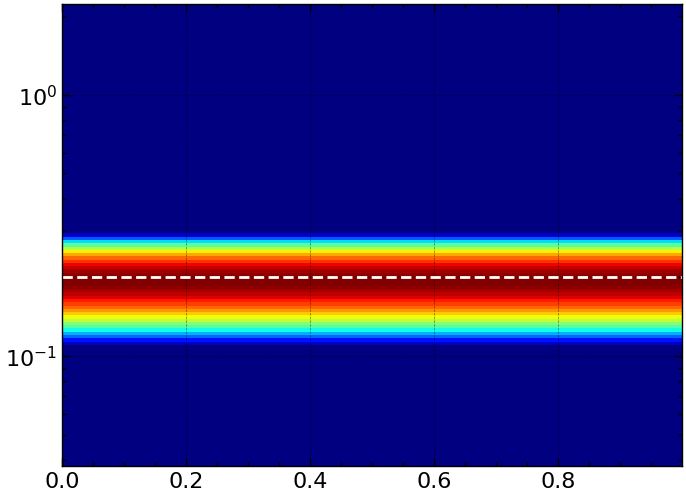

In [93]:
import matplotlib.colors
N = 2 ** 14
t = np.linspace(0, 1, N, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
padtyle = None
omega = 5.0 * 2 * np.pi
sig_cos = np.cos(omega * t)
sig_sin = np.sin(omega * t)

omega0 = .2
mu = omega0
scales = np.geomspace(2 ** 7, 2 ** 13, 12 * 12, endpoint = False)[:-3]
# scales = np.geomspace(2 ** 1, 2 ** 13, 12 * 12, endpoint = False)[:-3]

import ssqueezepy
coef_cos, _ = ssqueezepy.cwt(sig_cos, ('morlet', {'mu': mu}), scales = scales.astype(np.float32), fs = fs, l1_norm = False, padtype = padtyle)
coef_sin, _ = ssqueezepy.cwt(sig_sin, ('morlet', {'mu': mu}), scales = scales.astype(np.float32), fs = fs, l1_norm = False, padtype = padtyle)

plt.close()
ax1 = plt.subplot(1, 1, 1)

scale_to_period = 4 * np.pi / (mu + np.sqrt(2 + mu ** 2))

x0 = brentq(transcendental_eq, np.sqrt(1.5), (np.sqrt(omega0 ** 2 + 2) + omega0) / 1, args=(omega0,), xtol = 1e-12)
scale_to_period = 2 * np.pi / x0

print(scale_to_period)
period = scale_to_period * scales * dt

power = np.abs(coef_cos) ** 2 + np.abs(coef_sin) ** 2
ax1.pcolormesh(t, period, power, cmap = 'jet', norm = matplotlib.colors.LogNorm(vmax = np.max(power), vmin = np.max(power) / 2), zorder = -1)
ax1.axhline(2 * np.pi / omega, color='w', linestyle='--', label='Fourier Frequency')

ax1.set_yscale('log')

plt.show()

In [2]:
import pywt

wavlist = pywt.wavelist(kind="continuous")
dwt_families = np.array(['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey'])
cwt_families = np.array(['gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor'])
selected_dwt_wavelets = [pywt.wavelist(fam)[0] for fam in dwt_families if len(pywt.wavelist(fam)) > 0] + \
                    [pywt.wavelist(fam)[len(pywt.wavelist(fam)) // 2] for fam in dwt_families if len(pywt.wavelist(fam)) > 1] + \
                    [pywt.wavelist(fam)[-1] for fam in dwt_families if len(pywt.wavelist(fam)) > 2]
# Add CWT wavelets
selected_cwt_wavelets = [pywt.wavelist(fam)[0] for fam in cwt_families if len(pywt.wavelist(fam)) > 0] + \
                        [pywt.wavelist(fam)[len(pywt.wavelist(fam)) // 2] for fam in cwt_families if len(pywt.wavelist(fam)) > 1] + \
                        [pywt.wavelist(fam)[-1] for fam in cwt_families if len(pywt.wavelist(fam)) > 2]
selected_cwt_wavelets = sorted(selected_cwt_wavelets)
selected_dwt_wavelets = sorted(selected_dwt_wavelets)

wavlist = selected_cwt_wavelets

for i in range(len(wavlist)):
    if wavlist[i] in ['cmor', 'shan']:
        wavlist[i] += '1.0-1.0'
    elif wavlist[i] == 'fbsp':
        wavlist[i] += '1.0-1.5-1.0'

wavlist.append('cmor3.0-1.0')
wavlist.append('cmor6.0-1.0')
wavlist.append('shan2.0-1.0')
wavlist.append('fbsp2.0-1.5-1.0')
wavlist = sorted(wavlist)

selected_cwt_wavelets = ['cgau1', 'cgau5', 'cgau8', 'cmor1.0-1.0', 'cmor3.0-1.0', 'cmor6.0-1.0', 'morl', 'fbsp1.0-1.5-1.0', 'fbsp2.0-1.5-1.0', 'mexh', 'shan1.0-1.0', 'shan2.0-1.0', 'gaus1', 'gaus5', 'gaus8']

selected_dwt_wavelets = ['bior1.1',
 'bior3.1',
 'bior6.8',
 'coif1',
 'coif17',
 'coif9',
 'db1',
 'db20',
 'db38',
 'rbio1.1',
 'rbio3.1',
 'rbio6.8',
 'sym11',
 'sym2',
 'sym20',
  'dmey',
 'haar',]

<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\190241719.py:21: SyntaxWarning: invalid escape sequence '\e'
  ax.set_xlabel("$\eta$")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\190241719.py:22: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel("$\psi(\eta)$")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\190241719.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


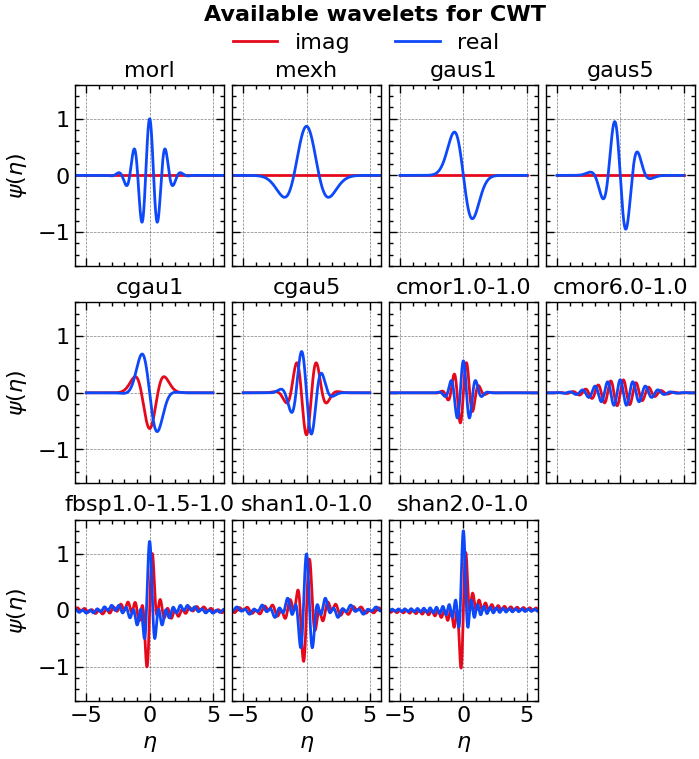

In [333]:
import matplotlib.pyplot as plt
import numpy as np

wavlist = ['cgau1', 'cgau5', 'cgau8', 'cmor1.0-1.0', 'cmor3.0-1.0', 'cmor6.0-1.0', 'morl', 'fbsp1.0-1.5-1.0', 'fbsp2.0-1.5-1.0', 'mexh', 'shan1.0-1.0', 'shan2.0-1.0', 'gaus1', 'gaus5', 'gaus8']
wavlist = ['morl', 'mexh', 'gaus1', 'gaus5', 'cgau1', 'cgau5', 'cmor1.0-1.0', 'cmor6.0-1.0', 'fbsp1.0-1.5-1.0', 'shan1.0-1.0', 'shan2.0-1.0']

cols = 4
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=figsize_tall,
                        sharex=True, sharey=True, 
                        gridspec_kw={'wspace': 0.05, 'hspace': 0.20})
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.imag(psi), 'C1-', label="imag")

    ax.plot(x, np.real(psi), 'C0-', label = 'real')
    # if np.any(np.imag(psi)):
        # Only plot imaginary part if it exists
    ax.set_xlabel("$\eta$")
    ax.set_ylabel("$\psi(\eta)$")
    ax.set_title(wavelet)
    ax.set_xlim([-5.9, 5.9])
    ax.set_ylim([-1.6, 1.6])

fig.align_labels()

for ax in axs[:, 1:].flatten():
    ax.set_ylabel("")

for ax in axs.flatten()[:-cols]:
    ax.set_xlabel("")

fig.delaxes(axs.flatten()[-1])

axs.flatten()[1].legend(loc="upper center", ncol=2, bbox_to_anchor = (0.9, 1.4), frameon=False, fontsize=16)
plt.suptitle("Available wavelets for CWT", **title_font)
plt.tight_layout()
# plt.show()
plt.savefig(save_path + 'figure_cwt_family.png',bbox_inches='tight',dpi=300)


In [136]:
import pywt

sig = [1, 2, 3, 4, 5, 6]
cA, cD = pywt.dwt(sig, 'db1')  # Haar wavelet
print("Approximation (cA):", cA)
print("Detail (cD):", cD)

# Reconstruction
reconstructed = pywt.idwt(cA, cD, 'db1')
print("Reconstructed:", reconstructed)

Approximation (cA): [2.12132034 4.94974747 7.77817459]
Detail (cD): [-0.70710678 -0.70710678 -0.70710678]
Reconstructed: [1. 2. 3. 4. 5. 6.]


<>:68: SyntaxWarning: invalid escape sequence '\d'
<>:68: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_33476\3056593824.py:68: SyntaxWarning: invalid escape sequence '\d'
  ax1.set_xlabel('Time [$\delta t$]')


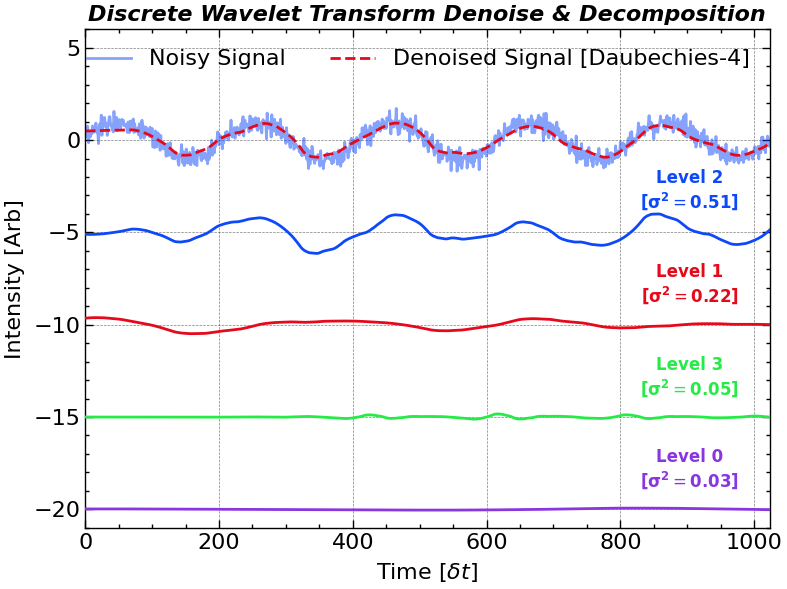

In [250]:
# Generate synthetic noisy sinusoidal signal
np.random.seed(0)
N = 2 ** 10
t = np.linspace(0, 1, N)
sig_clean = np.sin(2 * np.pi * 5 * t)
sig_nosiy = sig_clean + np.random.normal(0, 0.3, size=N)

level = 9

# Wavelet decomposition
wavelet = 'db4'
cA, *cDs = pywt.wavedec(sig_nosiy, wavelet, level = level)
# cA, cDs = coeffs[0], coeffs[1:]

# Threshold calculation
sigma = np.median(np.abs(cDs[-1])) / 0.6745
threshold = sigma * np.sqrt(2 * np.log(N))

# Soft thresholding
cDs_denoised = [pywt.threshold(d, threshold, mode='soft') for d in cDs]

# Reconstruction
sig_denoised = pywt.waverec([cA] + cDs_denoised, wavelet)

# coeffs  = pywt.wavedec(sig_nosiy, wavelet, mode='periodization', level=level)
# cA_L, *cDs = coeffs        # cDs = [D_L, D_{L-1}, …, D_1]

# -------- 2. 逐层重构到原长度 N --------
N      = len(sig_nosiy)
reconA = pywt.upcoef('a', cA, wavelet, level=level, take=N)
reconDs = np.array([pywt.upcoef('d', cD, wavelet, level=lev, take=N)
           for lev, cD in zip(range(level, 0, -1), cDs_denoised)])

reconDs_std = np.std(reconDs, axis=1)

reconDs = reconDs[np.argsort(-reconDs_std)]
reconDs_level = np.arange(0, level)[np.argsort(-reconDs_std)]
reconDs_std = reconDs_std[np.argsort(-reconDs_std)]

plt.close()
plt.figure(figsize = figsize_normal)
ax1 = plt.subplot()

offset = 0.0
idx = 0
for i in range(len(reconDs)):
    if reconDs_std[i] > 0.01:
        offset -= 5
        ax1.plot(offset + reconDs[i], color = f"C{idx}", linestyle = '-', zorder = 10 - i)
        ax1.text(
            N - 120,
            offset + 1 + reconDs[i][-1],
            f'Level {reconDs_level[i]}\n' + r'[$\mathbf{\sigma^2}=$' + f'{reconDs_std[i]:.2f}]',
            fontsize=12,
            color=f"C{idx}",
            ha='center',
            va='bottom',
            weight='bold'
        )
        idx += 1

ax1.set_ylim(-21, 6)
ax1.plot(sig_nosiy, label='Noisy Signal', alpha=0.5)
ax1.plot(sig_denoised, label='Denoised Signal [Daubechies-4]', color='C1')
ax1.legend(loc='upper right', frameon=False, ncol = 2)

ax1.set_ylabel('Intensity [Arb]')
ax1.set_xlabel('Time [$\delta t$]')
plt.autoscale(axis='x', tight=True)
ax1.set_title('Discrete Wavelet Transform Denoise & Decomposition', **title_font)
plt.tight_layout()

plt.savefig(save_path + 'figure_dwt_denoise.png',bbox_inches='tight',dpi=300)

plt.show()

In [239]:
reconDs.shape

(9, 1024)

In [76]:
original

array([[0.8862745 , 0.8862745 , 0.8745098 , ..., 0.9019608 , 0.8666667 ,
        0.78431374],
       [0.8862745 , 0.8862745 , 0.8745098 , ..., 0.9019608 , 0.8666667 ,
        0.78431374],
       [0.8862745 , 0.8862745 , 0.8745098 , ..., 0.9019608 , 0.8666667 ,
        0.78431374],
       ...,
       [0.32941177, 0.32941177, 0.36078432, ..., 0.6784314 , 0.6745098 ,
        0.69411767],
       [0.32156864, 0.32156864, 0.3764706 , ..., 0.7019608 , 0.70980394,
        0.7254902 ],
       [0.32156864, 0.32156864, 0.3764706 , ..., 0.7019608 , 0.70980394,
        0.7254902 ]], shape=(512, 512), dtype=float32)

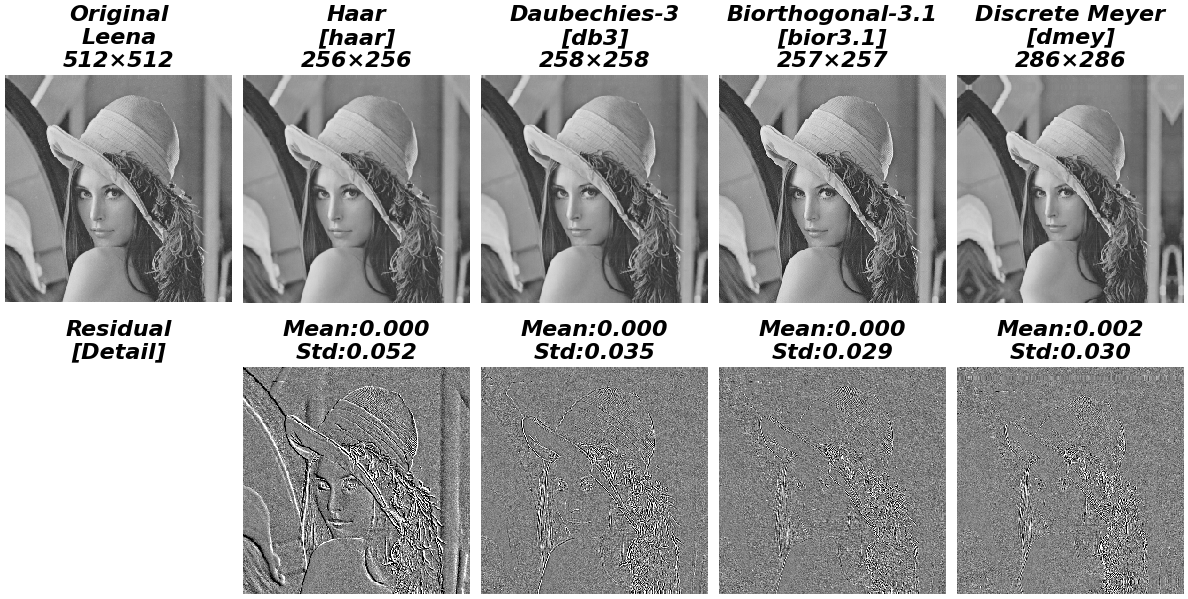

In [252]:
# Load image
import scipy.ndimage


original = pywt.data.camera()
original = matplotlib.image.imread('Data/leena.png')[::-1, ::-1, :]
original = np.mean(original, axis = -1)

original += np.random.normal(0, .0, size=original.shape)

plt.clf()
plt.cla()
plt.close()


# ax1 = plt.subplot(2, 5, 1, aspect = 'equal')
# ax2 = plt.subplot(2, 5, 2, aspect = 'equal', sharex = ax1, sharey = ax1)
# ax3 = plt.subplot(2, 5, 3, aspect = 'equal')
# ax4 = plt.subplot(2, 5, 4, aspect = 'equal')
# ax5 = plt.subplot(2, 5, 5, aspect = 'equal', sharex = ax3, sharey = ax3)
# ax6 = plt.subplot(2, 5, 6, aspect = 'equal')
# ax7 = plt.subplot(2, 5, 7, aspect = 'equal', sharex = ax3, sharey = ax3)
# ax8 = plt.subplot(2, 5, 8, aspect = 'equal', sharex = ax3, sharey = ax3)
# ax9 = plt.subplot(2, 5, 9, aspect = 'equal', sharex = ax3, sharey = ax3)
# ax10 = plt.subplot(2, 5, 10, aspect = 'equal', sharex = ax3, sharey = ax3)

_, axs = plt.subplots(2, 5, figsize = (12, 6.5), sharex = True, sharey = True)
ax1, ax2, ax3, ax4, ax5 = axs[0]
ax6, ax7, ax8, ax9, ax10 = axs[1]

ax1.set_title('Original\nLeena\n%d×%d' % (original.shape), **title_font)
ax1.pcolormesh(np.linspace(0, 1, original.shape[0]), np.linspace(0, 1, original.shape[1]), original, cmap='gray', vmax = 1, vmin = 0)
ax6.set_title('Residual\n[Detail]', **title_font)

LL, (LH, HL, HH) = pywt.dwt2(original, 'haar')
ax2.set_title('Haar\n[haar]\n%d×%d' % (LL.shape), **title_font)
ax7.set_title('Mean:%.3f\nStd:%.3f' % (np.mean(LH + HL + HH), np.std(LH + HL + HH)), **title_font)
ax2.pcolormesh(np.linspace(0, 1, LL.shape[0]), np.linspace(0, 1, LL.shape[1]), LL, cmap='gray', vmax = 2, vmin = 0)
ax7.pcolormesh(np.linspace(0, 1, LL.shape[0]), np.linspace(0, 1, LL.shape[1]), LH + HL + HH, cmap='gray', vmax = 0.1, vmin = -0.1)

LL, (LH, HL, HH) = pywt.dwt2(original, 'db3')
ax3.set_title('Daubechies-3\n[db3]\n%d×%d' % (LL.shape), **title_font)
ax8.set_title('Mean:%.3f\nStd:%.3f' % (np.mean(LH + HL + HH), np.std(LH + HL + HH)), **title_font)
ax3.pcolormesh(np.linspace(0, 1, LL.shape[0]), np.linspace(0, 1, LL.shape[1]), LL, cmap='gray', vmax = 2, vmin = 0)
ax8.pcolormesh(np.linspace(0, 1, LL.shape[0]), np.linspace(0, 1, LL.shape[1]), LH + HL + HH, cmap='gray', vmax = 0.1, vmin = -0.1)

LL, (LH, HL, HH) = pywt.dwt2(original, 'bior3.1')
ax4.set_title('Biorthogonal-3.1\n[bior3.1]\n%d×%d' % (LL.shape), **title_font)
ax9.set_title('Mean:%.3f\nStd:%.3f' % (np.mean(LH + HL + HH), np.std(LH + HL + HH)), **title_font)
ax4.pcolormesh(np.linspace(0, 1, LL.shape[0]), np.linspace(0, 1, LL.shape[1]), LL, cmap='gray', vmax = 2, vmin = 0)
ax9.pcolormesh(np.linspace(0, 1, LL.shape[0]), np.linspace(0, 1, LL.shape[1]), LH + HL + HH, cmap='gray', vmax = 0.1, vmin = -0.1)

LL, (LH, HL, HH) = pywt.dwt2(original, 'dmey')
ax5.set_title('Discrete Meyer\n[dmey]\n%d×%d' % (LL.shape), **title_font)
ax10.set_title('Mean:%.3f\nStd:%.3f' % (np.mean(LH + HL + HH), np.std(LH + HL + HH)), **title_font)
ax5.pcolormesh(np.linspace(0, 1, LL.shape[0]), np.linspace(0, 1, LL.shape[1]), LL, cmap='gray', vmax = 2, vmin = 0)
ax10.pcolormesh(np.linspace(0, 1, LL.shape[0]), np.linspace(0, 1, LL.shape[1]), LH + HL + HH, cmap='gray', vmax = 0.1, vmin = -0.1)

ax6.set_ylabel('Residual', **title_font)
for ax in plt.gcf().axes:
    ax.axis('off')
    ax.set_box_aspect(aspect=1)

plt.tight_layout()
plt.savefig(save_path + 'figure_dwt_image_compression_comparison.png',bbox_inches='tight',dpi=300)

plt.show()

cA:0.332, cH:0.027, cV:0.039, cD:0.015
cA:0.049, cH:0.022, cV:0.048, cD:0.029
cA:0.054, cH:0.040, cV:0.056, cD:0.042


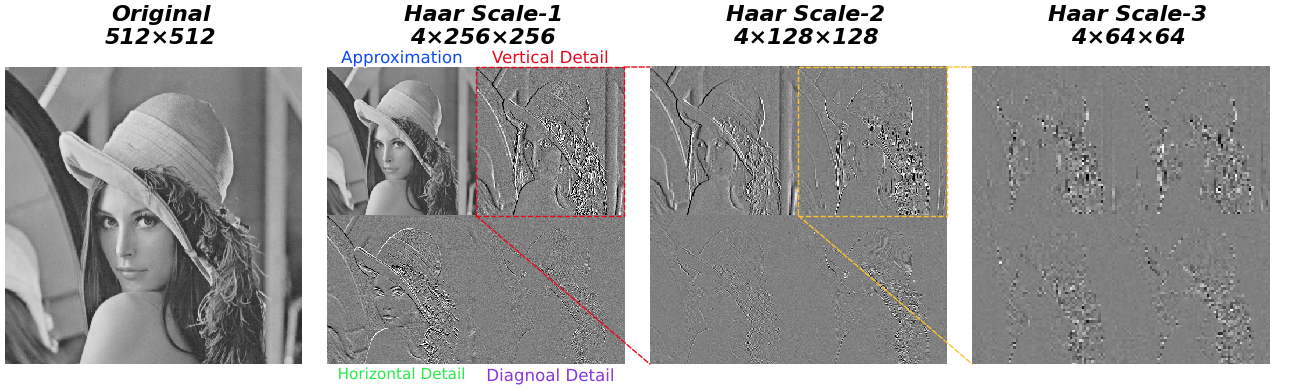

In [293]:
plt.close()
plt.figure(figsize = (13, 4.5))
ax1 = plt.subplot(1, 4, 1, aspect = 'equal')
ax2 = plt.subplot(1, 4, 2, aspect = 'equal', sharex = ax1, sharey = ax1)
ax3 = plt.subplot(1, 4, 3, aspect = 'equal', sharex = ax1, sharey = ax1)
ax4 = plt.subplot(1, 4, 4, aspect = 'equal', sharex = ax1, sharey = ax1)

ax1.set_title('Original\n%d×%d' % (original.shape), **title_font)
ax1.pcolormesh(np.linspace(0.0, 1., original.shape[0]), np.linspace(0.0, 1.0, original.shape[1]), original, cmap='gray', vmax = 1, vmin = 0)

cA, (cH, cV, cD) = pywt.dwt2(original, 'haar')
print('cA:%.3f, cH:%.3f, cV:%.3f, cD:%.3f' % (np.std(cA), np.std(cH), np.std(cV), np.std(cD)))

ax2.set_title('Haar Scale-1\n4×%d×%d' % (cA.shape), **title_font)
ax2.pcolormesh(np.linspace(0.0, 0.5, cA.shape[0]), np.linspace(0.5, 1.0, cA.shape[1]), cA, cmap='gray', vmax = 2, vmin = 0)
ax2.pcolormesh(np.linspace(0.5, 1.0, cV.shape[0]), np.linspace(0.5, 1.0, cV.shape[1]), cV, cmap='gray', vmax = 0.1, vmin = -0.1)
ax2.pcolormesh(np.linspace(0.0, 0.5, cH.shape[0]), np.linspace(0.0, 0.5, cH.shape[1]), cH, cmap='gray', vmax = 0.1, vmin = -0.1)
ax2.pcolormesh(np.linspace(0.5, 1.0, cD.shape[0]), np.linspace(0.0, 0.5, cD.shape[1]), cD, cmap='gray', vmax = 0.1, vmin = -0.1)

from matplotlib.patches import ConnectionPatch, Rectangle

rec = Rectangle((0.5, 0.5), 0.5, 0.5, linewidth=1, edgecolor='C1', facecolor='none', linestyle = '--')
ax2.add_patch(rec)
con = ConnectionPatch(xyA = (.5, 0.5), xyB = (0.0, 0.0), axesA=ax2, axesB=ax3, coordsA = ax2.transData, coordsB = ax3.transData, color='C1', linestyle = '--')
plt.gcf().add_artist(con)
con = ConnectionPatch(xyA = (1., 1.0), xyB = (0.0, 1.0), axesA=ax2, axesB=ax3, coordsA = ax2.transData, coordsB = ax3.transData, color='C1', linestyle = '--')
plt.gcf().add_artist(con)

cA, (cH, cV, cD) = pywt.dwt2(cV, 'haar')
print('cA:%.3f, cH:%.3f, cV:%.3f, cD:%.3f' % (np.std(cA), np.std(cH), np.std(cV), np.std(cD)))

ax3.set_title('Haar Scale-2\n4×%d×%d' % (cA.shape), **title_font)
ax3.pcolormesh(np.linspace(0.0, 0.5, cA.shape[0]), np.linspace(0.5, 1.0, cA.shape[1]), cA, cmap='gray', vmax = 0.2, vmin = -0.2)
ax3.pcolormesh(np.linspace(0.5, 1.0, cV.shape[0]), np.linspace(0.5, 1.0, cV.shape[1]), cV, cmap='gray', vmax = 0.2, vmin = -0.2)
ax3.pcolormesh(np.linspace(0.0, 0.5, cH.shape[0]), np.linspace(0.0, 0.5, cH.shape[1]), cH, cmap='gray', vmax = 0.2, vmin = -0.2)
ax3.pcolormesh(np.linspace(0.5, 1.0, cD.shape[0]), np.linspace(0.0, 0.5, cD.shape[1]), cD, cmap='gray', vmax = 0.2, vmin = -0.2)

rec = Rectangle((0.5, 0.5), 0.5, 0.5, linewidth=1, edgecolor='C4', facecolor='none', linestyle = '--')
ax3.add_patch(rec)
con = ConnectionPatch(xyA = (.5, 0.5), xyB = (0.0, 0.0), axesA=ax3, axesB=ax4, coordsA = ax3.transData, coordsB = ax4.transData, color='C4', linestyle = '--')
plt.gcf().add_artist(con)
con = ConnectionPatch(xyA = (1., 1.0), xyB = (0.0, 1.0), axesA=ax3, axesB=ax4, coordsA = ax3.transData, coordsB = ax4.transData, color='C4', linestyle = '--')
plt.gcf().add_artist(con)

cA, (cH, cV, cD) = pywt.dwt2(cV, 'haar')
print('cA:%.3f, cH:%.3f, cV:%.3f, cD:%.3f' % (np.std(cA), np.std(cH), np.std(cV), np.std(cD)))


ax4.set_title('Haar Scale-3\n4×%d×%d' % (cA.shape), **title_font)
ax4.pcolormesh(np.linspace(0.0, 0.5, cA.shape[0]), np.linspace(0.5, 1.0, cA.shape[1]), cA, cmap='gray', vmax = 0.4, vmin = -0.4)
ax4.pcolormesh(np.linspace(0.5, 1.0, cV.shape[0]), np.linspace(0.5, 1.0, cV.shape[1]), cV, cmap='gray', vmax = 0.4, vmin = -0.4)
ax4.pcolormesh(np.linspace(0.0, 0.5, cH.shape[0]), np.linspace(0.0, 0.5, cH.shape[1]), cH, cmap='gray', vmax = 0.4, vmin = -0.4)
ax4.pcolormesh(np.linspace(0.5, 1.0, cD.shape[0]), np.linspace(0.0, 0.5, cD.shape[1]), cD, cmap='gray', vmax = 0.4, vmin = -0.4)


for i in range(2):
    cA, (cH, cV, cD) = pywt.dwt2(cD, 'haar')

for ax in plt.gcf().axes:
    ax.set_xlim(0, 1.05)
    ax.set_ylim(0, 1.05)
    ax.axis('off')
plt.tight_layout()

ax2.text(0.25, 1.00, 'Approximation', fontsize = 12, path_effects=[pe.withStroke(linewidth=2.0, foreground="w")], color='C0', ha='center', va='bottom')
ax2.text(0.75, 1.00, 'Vertical Detail', fontsize = 12, path_effects=[pe.withStroke(linewidth=2.0, foreground="w")], color='C1', ha='center', va='bottom')
ax2.text(0.25, -0.01, 'Horizontal Detail', fontsize = 11, path_effects=[pe.withStroke(linewidth=2.0, foreground="w")], color='C2', ha='center', va='top')
ax2.text(0.75, -0.01, 'Diagnoal Detail', fontsize = 12, path_effects=[pe.withStroke(linewidth=2.0, foreground="w")], color='C3', ha='center', va='top')

plt.savefig(save_path + 'figure_dwt_image_compression.png',bbox_inches='tight',dpi=300)

plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\876098529.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\876098529.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


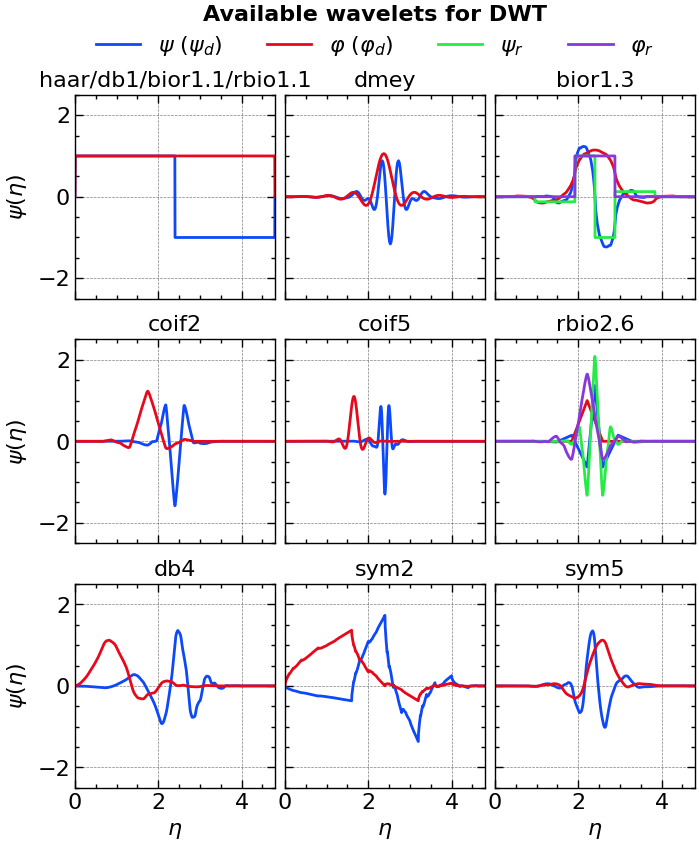

In [398]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

level = 10
selected_dwt_wavelets = [ 
 'haar','dmey',
 'bior1.3',
 'coif2',
 'coif5',
 'rbio2.6',
 'db4',
 'sym2',
 'sym5',
]
# ---------------------------- parameters ----------------------------
# selected_dwt_wavelets = [...]           # your list
title_font = {"fontsize": 16, "weight": "bold"}
cols = 3
rows = (len(selected_dwt_wavelets) + cols - 1) // cols
x_common_max = 4.8                      # the length you want on every axis
# --------------------------------------------------------------------

fig, axs = plt.subplots(rows, cols, figsize=(8, 3.0 * rows),
                        sharex=True, sharey=True,
                        gridspec_kw={'wspace': 0.05, 'hspace': 0.2})

for ax, wname in zip(axs.flatten(), selected_dwt_wavelets):
    wav = pywt.Wavelet(wname)

    # ---------------- fetch wavelet functions -----------------------
    if 'bio' in wname:                  # biorthogonal returns 5 arrays
        phi, psi, phi_r, psi_r, x = wav.wavefun(level = level)
    elif wname == 'dmey':
        phi, psi, x = wav.wavefun(level = 4)
    else:                               # orthogonal families
        phi, psi, x = wav.wavefun(level = level)

    # ------------- ALIGN SUPPORT: shift to 0, stretch to 4.8 --------
    x = x - x[0]                        # left edge → 0
    x = x * (x_common_max / x[-1])      # right edge → 4.8

    if wname == 'dmey':
        x = x * 4 - 6.5

    # ---------------------------- PLOT ------------------------------
    ax.plot(x, psi, '-', label=r'$\psi$ ($\psi_d$)')
    ax.plot(x, phi, '-', label=r'$\varphi$ ($\varphi_d$)')

    if 'bio' in wname:                  # biorthogonal returns 5 arrays
        ax.plot(x, psi_r, '-', label=r'$\psi_r$')
        ax.plot(x, phi_r, '-', label=r'$\varphi_r$')

    ax.set_title(wname)
    ax.set_xlim(0.0, x_common_max)
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlabel(r'$\eta$')
    ax.set_ylabel(r'$\psi(\eta)$')

# ---------- tidy up (delete unused axes, one shared legend) ----------
for ax in axs.flatten()[len(selected_dwt_wavelets):]:
    fig.delaxes(ax)
axs.flatten()[0].set_title('haar/db1/bior1.1/rbio1.1')
handles, labels = axs[0, 2].get_legend_handles_labels()
fig.legend(handles, labels, ncol=4, loc="upper center", frameon=False, bbox_to_anchor=(0.5, 0.97))

fig.align_labels()

for ax in axs[:, 1:].flatten():
    ax.set_ylabel("")

for ax in axs.flatten()[:-cols]:
    ax.set_xlabel("")

plt.tight_layout()

plt.suptitle("Available wavelets for DWT", **title_font)
plt.tight_layout()
# plt.show()
plt.savefig(save_path + 'figure_dwt_family.png',bbox_inches='tight',dpi=300)
plt.show()


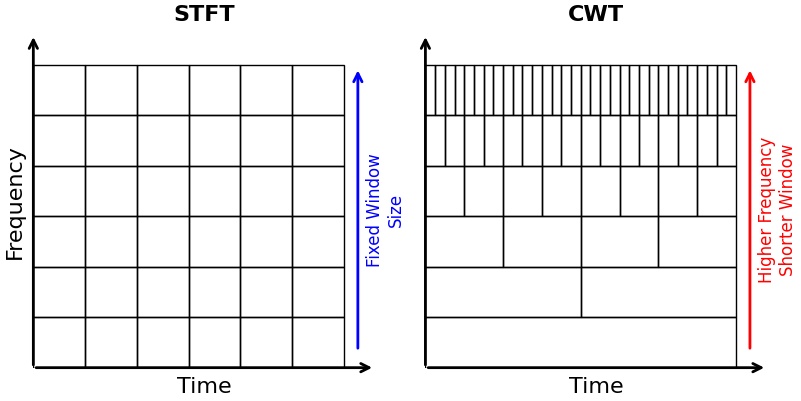

In [458]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 新建画布，1×2 子图
fig, axes = plt.subplots(1, 2, figsize=figsize_short, constrained_layout=True, sharex = True, sharey = True)

# === (a) Uniform FT tiling ===
ax = axes[0]
ax.set_title('STFT', pad=10, **title_font)
ax.set_xlim(0, 1); ax.set_ylim(0, 1)
ax.set_xlabel('Time'); ax.set_ylabel('Frequency')
# 箭头坐标轴
ax.annotate('', xy=(1, 0), xycoords='axes fraction', xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', lw=2, mutation_scale=15))
ax.annotate('', xy=(0, 1), xycoords='axes fraction', xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', lw=2, mutation_scale=15))
# 隐藏多余边框与刻度
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False); ax.spines['left'].set_visible(False)

ax.set_xticks([]); ax.set_yticks([])

# 绘制均匀网格（6×6）
n = 6
for i in range(n):
    for j in range(n):
        rect = patches.Rectangle((i/n, j/n), 1/n, 1/n,
                                 fill=False, edgecolor='black', linewidth=1)
        ax.add_patch(rect)

# === (b) Scale-dependent (Wavelet) tiling ===
ax = axes[1]
ax.set_title('CWT', pad=10, **title_font)
ax.set_xlim(0, 1); ax.set_ylim(0, 1)
ax.set_xlabel('Time'); ax.set_ylabel('Frequency')
ax.annotate('', xy=(1, 0), xycoords='axes fraction', xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', lw=2, mutation_scale=15))
ax.annotate('', xy=(0, 1), xycoords='axes fraction', xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', lw=2, mutation_scale=15))
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False); ax.spines['left'].set_visible(False)
ax.set_xticks([]); ax.set_yticks([])

# 以 4 个尺度为例：低频（i=0）1 个宽窗口→高频（i=3）8 个窄窗口
n_scales = 6
for i in range(n_scales):
    y0 = i / n_scales
    band_h = 1 / n_scales
    n_win = 2 ** i
    for k in range(n_win):
        rect = patches.Rectangle((k/n_win, y0), 1/n_win, band_h,
                                 fill=False, edgecolor='black', linewidth=1)
        ax.add_patch(rect)

# Add an arrow and annotation on the right side of axes[1]
axes[1].annotate('', xy=(0.95, 0.9), xycoords='axes fraction',
                    xytext=(.95, 0.05), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle='->', lw=2, mutation_scale=15, color='red'),
                    ha='center', va='center', fontsize=12, color='red', rotation=90)
axes[1].text(1.03, 0.475, 'Higher Frequency\nShorter Window', color='red', rotation = 90, va = 'center', ha = 'center',
             fontsize=12, transform=axes[1].transAxes)
axes[0].annotate('', xy=(0.95, 0.9), xycoords='axes fraction',
                    xytext=(.95, 0.05), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle='->', lw=2, mutation_scale=15, color='blue'),
                    ha='center', va='center', fontsize=12, color='blue', rotation=90)
axes[0].text(1.03, 0.475, 'Fixed Window\nSize', color='blue', rotation=90, va='center', ha='center',
                fontsize=12, transform=axes[0].transAxes)
axes[1].set_ylabel("")
axes[0].set_xlim(0, 1.1)
axes[0].set_ylim(0, 1.1)
plt.savefig(save_path + 'figure_stft_vs_cwt.png',bbox_inches='tight',dpi=300)

plt.show()


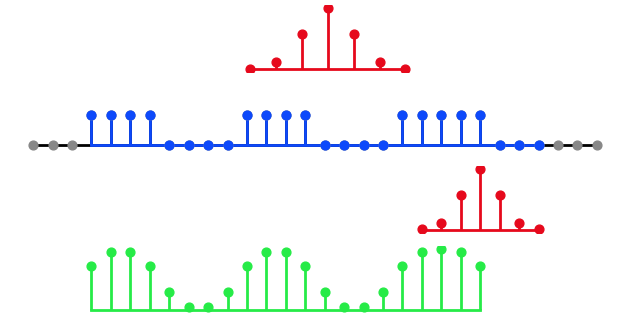

In [124]:
plt.close()
plt.figure(figsize = figsize_short)
ax1 = plt.subplot(4, 1, 1)
ax2 = plt.subplot(4, 1, 2)
ax3 = plt.subplot(4, 1, 3, sharex = ax2)
ax4 = plt.subplot(4, 1, 4, sharex = ax2)
 
N = 24
sig = np.random.choice(np.arange(N), size = N, replace = True) / 2
sig = scipy.signal.square(np.linspace(0, 2 * np.pi, N, endpoint=False) * 3) + 1.0
N_kernel = 7
kernel_ma = np.exp(-5 * np.linspace(-1, 1, N_kernel) ** 2)
kernel_asym = kernel_ma * np.linspace(-1, 1, N_kernel) * 3
kernel_asym = np.array([0, -1, 0, 1, 0])
kernel = kernel_ma
N_kernel = kernel.size
ax1.stem(kernel, basefmt = 'C1-',  markerfmt = 'C1o', linefmt = 'C1-', label = 'Differentiation Kernel')
ax1.scatter(np.arange(N_kernel), kernel, color = 'C1', marker = 'o', label = 'Differentiation Kernel', zorder = 10, s = 40)

sig_padded = np.pad(sig, (N_kernel // 2, N_kernel // 2), mode = 'constant', constant_values = 0.0)
ax2.scatter(np.arange(-N_kernel // 2 + 1, N_kernel // 2 + N), sig_padded, color = '#888888', marker = 'o', label = 'Signal', zorder = 10, s = 40)

ax2.stem(np.arange(-N_kernel // 2 + 1, N_kernel // 2 + N), sig_padded, basefmt = 'k-',  markerfmt = 'ko', linefmt = 'k-')
ax2.scatter(np.arange(N), sig, color = 'C0', marker = 'o', label = 'Signal', zorder = 10, s = 40)
ax2.stem(np.arange(N), sig, basefmt = 'C0-',  markerfmt = 'C00', linefmt = 'C0-')

shift = 20
ax3.stem(shift + np.arange(N_kernel) - (N_kernel // 2), kernel, basefmt = 'C1-',  markerfmt = 'C1o', linefmt = 'C1-', label = 'Differentiation Kernel')
ax3.scatter(shift + np.arange(N_kernel) - (N_kernel // 2), kernel, color = 'C1', marker = 'o', label = 'Differentiation Kernel', zorder = 10, s = 40)

ax4.stem(np.convolve(sig, kernel, mode = 'same')[:shift + 1], basefmt = 'C2-',  markerfmt = 'C2o', linefmt = 'C2-', label = 'Smoothing')
ax4.scatter(np.arange(shift + 1), np.convolve(sig, kernel, mode = 'same')[:shift + 1], color = 'C2', marker = 'o', label = 'Smoothing', zorder = 10, s = 40)

ax1.set_xlim(-12 + 2.5, 12 + 2.5)
ax2.set_ylim(-.5, 4)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

plt.show()